<a href="https://colab.research.google.com/github/lanyu0322/phd_semester1/blob/master/sratio_wamp_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from shapely.geometry import Point

from scipy.optimize import leastsq
import statistics



# Average count sratio in both model(constraint)

In [0]:
rpath = os.path.join("drive", "My Drive", "lwir")                                                     
cpath  = os.path.join(rpath, "data", "nycdot")
cname  = "cams_ft_wd.feather"
camdat = pd.read_feather(os.path.join(cpath, cname))

In [0]:
fname3 = "/content/drive/My Drive/lwir/data/sratio_3gaussian.csv"
fname_pop = "/content/drive/My Drive/lwir/data/sratio_4pop_fit.csv"
srat3 = pd.read_csv(fname3)
srat_pop = pd.read_csv(fname_pop)

In [0]:
srat_pop

,sratio,park_area,number_bench,restaurant_number
0,1.900864e-01,45023.624565,0.0,253.0
1,4.512675e-01,0.000000,0.0,180.0
2,1.698275e-30,0.000000,0.0,8.0
3,6.872078e-01,58445.164287,1.0,201.0
4,7.090102e-01,19998.479164,1.0,36.0
...,...,...,...,...
152,1.483110e+02,45502.597890,2.0,75.0
153,2.981251e+00,233456.280673,0.0,0.0
154,5.216595e-01,22530.378565,0.0,5.0
155,3.289505e-02,119851.579490,1.0,88.0


In [0]:
foo = np.arange(10)

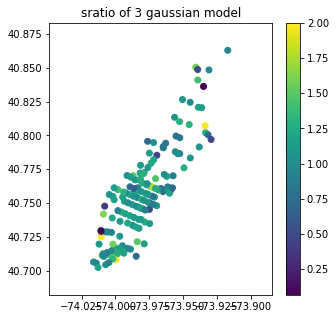

In [0]:
lats_cam = camdat["lat"]
lons_cam = camdat["lon"]

# cscl = 0.1
# norm = (srat3["0"] - srat3["0"].min())
# norm /= norm.max()
# norm = ((1 + 2 * cscl) * norm - cscl).clip(0, 1)

fig, ax = plt.subplots(figsize=[5, 5])
sct = ax.scatter(lons_cam, lats_cam, c=srat3["0"].clip(0, 2))
ax.set_title("sratio of 3 gaussian model")
ax.axis("equal")
fig.colorbar(sct)
fig.show()

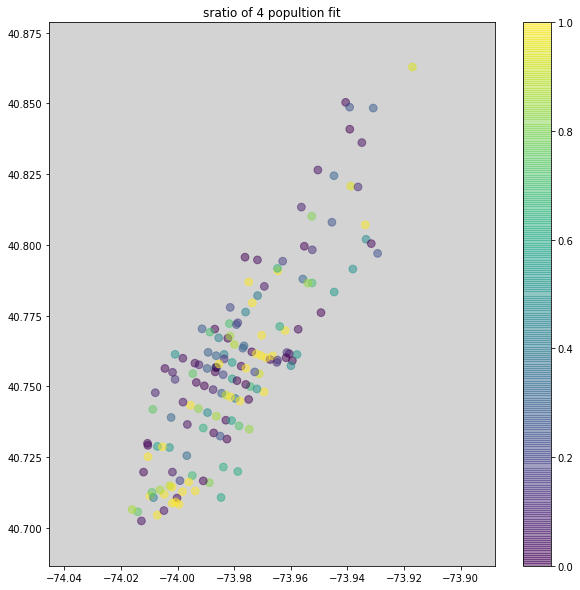

In [0]:
# cscl = 0.1
# norm_pop = (srat_pop["sratio"] - srat_pop["sratio"].min())
# norm_pop /= norm_pop.max()
# norm_pop = ((1 + 2 * cscl) * norm_pop - cscl).clip(0, 1)

fig, ax = plt.subplots(figsize=[10, 10])
ax.set_facecolor("lightgray")
sct = ax.scatter(lons_cam, lats_cam, s=60, alpha=0.5, c=srat_pop["sratio"].clip(0, 1))
ax.set_title("sratio of 4 popultion fit")
ax.axis("equal")
fig.colorbar(sct)
fig.show()

In [0]:
fname = "/content/drive/My Drive/lwir/data/parr_4pop_parameters.csv"
param = pd.read_csv(fname)

In [0]:
param

,0,1,2,3,4,5,6,7,8,9,10
0,26.647493,51.030908,77.229239,8.000000,2.377038,4.504383,4.482425,1.992540e+00,16.482142,0.006044,-0.292946
1,33.904389,55.488893,72.467264,3.905409,5.196340,5.489614,25.926173,1.629039e+01,46.272218,0.004927,0.954667
2,29.267321,44.044517,76.121447,6.045650,8.000000,2.633112,3.914534,4.038073e-30,0.840965,0.000914,-0.062780
3,35.946210,54.363003,73.422724,6.169011,8.000000,5.714093,54.753094,3.034761e+01,33.568391,0.005309,-0.094979
4,33.221340,50.239017,70.127266,4.628379,7.441750,8.000000,19.322480,1.602082e+01,25.869589,0.000840,0.126581
...,...,...,...,...,...,...,...,...,...,...,...
152,32.833989,48.082867,80.000000,4.165108,0.017634,8.000000,11.161389,1.181774e+03,4.775033,0.006224,-0.046805
153,29.236270,48.597627,79.786804,6.062434,8.000000,2.308122,1.984729,3.712260e+00,0.505675,0.000248,0.045705
154,33.846082,51.323202,72.106281,4.987476,4.379097,5.457693,5.044280,2.338473e+00,3.921236,0.000520,0.044556
155,32.236926,52.167302,69.259932,5.616564,4.581719,0.060347,59.896126,2.034177e+01,1176.871793,0.016712,-1.158486


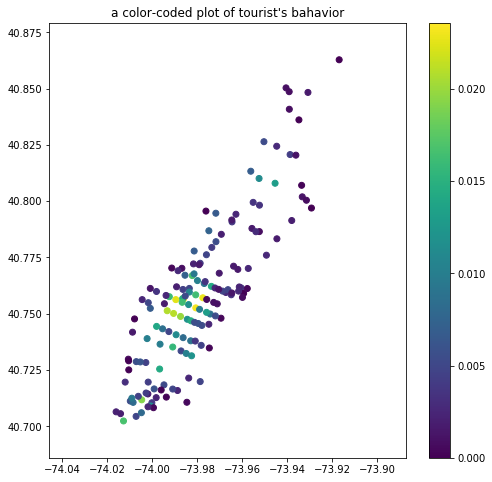

In [0]:
fig, ax = plt.subplots(figsize=(8, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax.axis("equal")
# cscl = 0.1
# norm = (param["9"] - param["9"].min())
# norm /= param["9"].max()
# norm = ((1 + 2 * cscl) * norm - cscl).clip(0, 1)
sct = ax.scatter(lons_cam, lats_cam, c=param["9"])
ax.set_title("a color-coded plot of tourist's bahavior")
fig.colorbar(sct)
fig.show()